In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


In [42]:
# Set parameters for the signal
N = 2048 # Number of sample points
T = 1 # Duration of the signal in seconds(x axis)
f0 = 1 # Fundamental frequency of the square wave in Hz (like a constant)
# List of harmonic numbers used to construct the square wave
harmonics = [1, 3, 5,20,50]

In [43]:
# We defined a square wave in this fucntion which we will try to reconstruct
def square_wave(t):
  return np.sign(np.sin(2.0 * np.pi * f0 * t))


In [44]:
# Fourier series approximation of the square wave
def square_wave_fourier(t, f0, N):
  result = np.zeros_like(t)
  for k in range(N):
  # The Fourier series of a square wave contains only odd harmonics.
    n = 2 * k + 1
  # Add harmonics to reconstruct the square wave.
    result += np.sin(2 * np.pi * n * f0 * t) / n
  return (4 / np.pi) * result

In [45]:
# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)
# Generate the original square wave
square = square_wave(t)

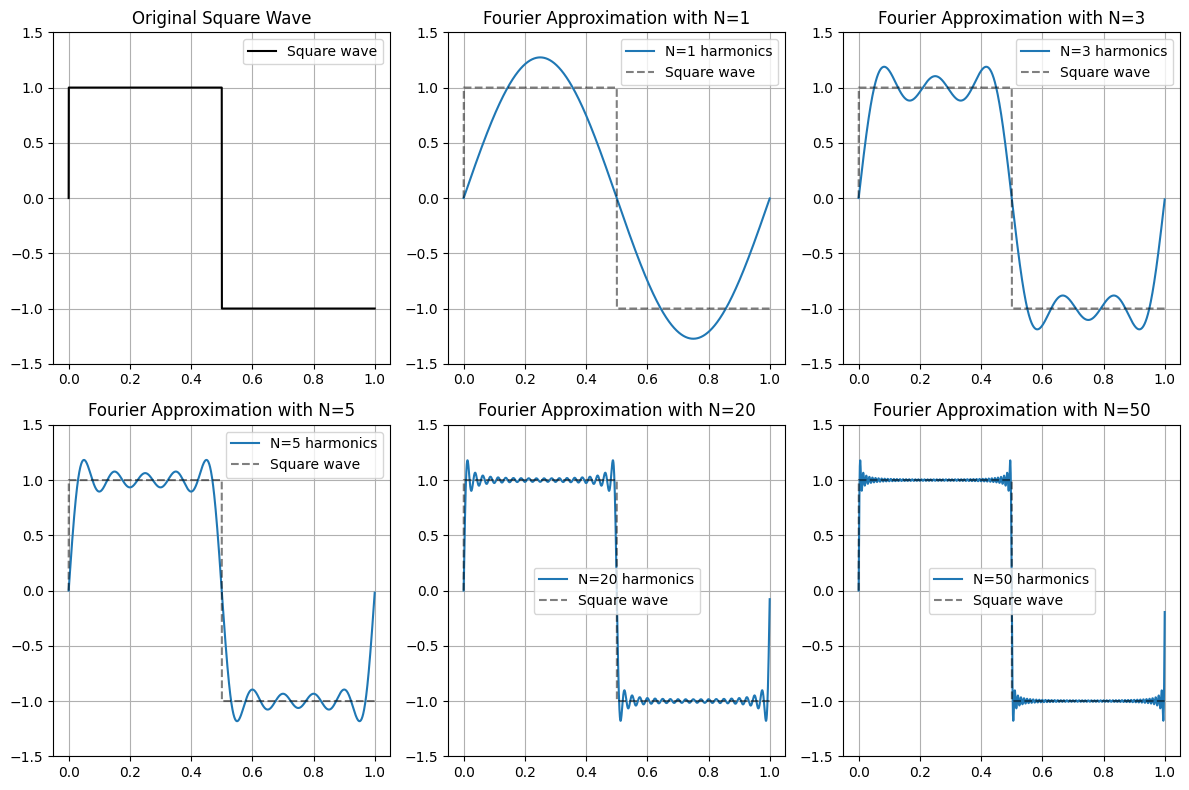

In [46]:
plt.figure(figsize=(12, 8))
# Plot the original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
# Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
  plt.subplot(2, 3, i)
  y = square_wave_fourier(t, f0, Nh)
  plt.plot(t, y, label=f"N={Nh} harmonics")
  plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
  plt.title(f"Fourier Approximation with N={Nh}")
  plt.ylim(-1.5, 1.5)
  plt.grid(True)
  plt.legend()
plt.tight_layout()
plt.show()

In [49]:
# If you increase the number of harmonics then :
# The wave becomes sharper — edges look steeper, and the flat parts become flatter.

# The approximation is much closer to the true square wave.

--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 9.447312 seconds
NumPy FFT Execution Time: 0.000302 seconds
FFT is approximately 31249.92 times faster.

Our DFT implementation is close to NumPy's FFT: True


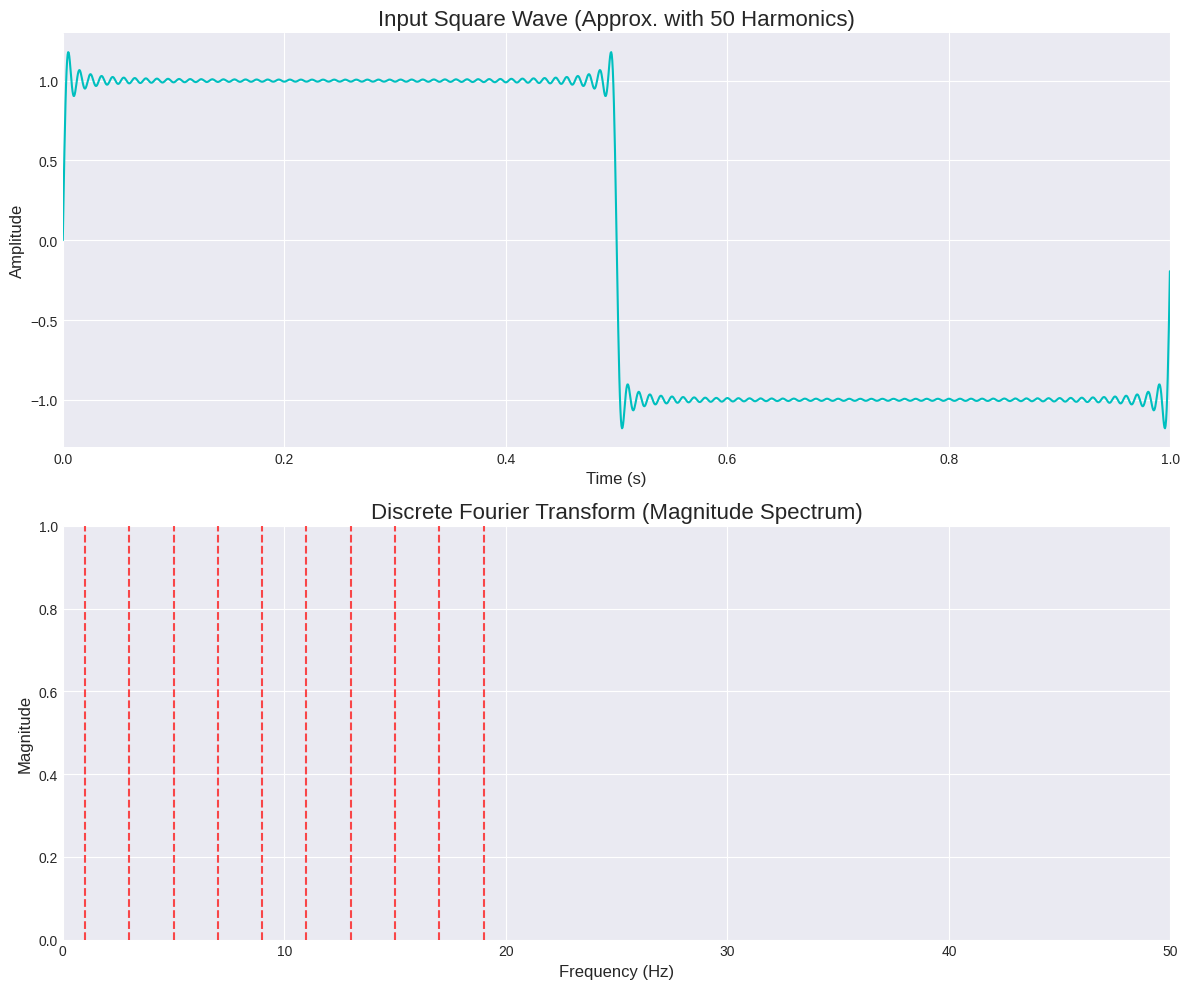

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import time

# --------------------------
# 1. Naïve DFT Implementation
# --------------------------
def naive_dft(x):
    """
    Compute the Discrete Fourier Transform (DFT) of a 1D signal.
    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).

    Args:
        x (np.ndarray): The input signal, a 1D NumPy array.

    Returns:
        np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)  # Output array
    for k in range(N):  # frequency bins and walk along the frequency axis
        for n in range(N):  # time samples and measure the strength at this point
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle) # the strength of that frequency in the signal
    return X

# --------------------------
# 2. Square Wave (Fourier Series Approximation)
# --------------------------
def square_wave_fourier(t, f0, N):
    """
    Approximate a square wave using N odd harmonics.
    """
    result = np.zeros_like(t)
    for k in range(N):
        n = 2 * k + 1   # odd harmonics: 1, 3, 5, ...
        result += np.sin(2 * np.pi * n * f0 * t) / n
    return (4 / np.pi) * result

# --------------------------
# 3. Generate Signal
# --------------------------
N = 2048          # Number of sample points
T = 1.0           # Duration in seconds
f0 = 1            # Fundamental frequency
t = np.linspace(0.0, T, N, endpoint=False)

# Construct a square wave using 50 harmonics
signal = square_wave_fourier(t, f0, 50)

# --------------------------
# 4. Time the Naïve DFT vs NumPy FFT
# --------------------------
start_time_naive = time.time()
dft_result = naive_dft(signal)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

start_time_fft = time.time()
fft_result = np.fft.fft(signal)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# Print timings
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

# Verify correctness
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result, fft_result)}")

# --------------------------
# 5. Prepare for Plotting
# --------------------------
xf = np.fft.fftfreq(N, d=T/N)[:N//2]        # frequency axis (positive half)
magnitude = 2.0/N * np.abs(dft_result[0:N//2])  # magnitude spectrum

# --------------------------
# 6. Visualization
# --------------------------
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Time-domain signal
ax1.plot(t, signal, color='c')
ax1.set_title('Input Square Wave (Approx. with 50 Harmonics)', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 1.0)  # show one full cycle
ax1.grid(True)

# Frequency-domain magnitude spectrum
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50)  # focus on low frequencies
ax2.grid(True)

# Highlight odd harmonics
for i in range(1, 20, 2):  # first 20 odd harmonics
    if i < len(xf):
        ax2.axvline(xf[i], color='r', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [2]:
import time
import math
import numpy as np
import torch

# ------------------------------
# 1. Square wave approximation
# ------------------------------
def square_wave_fourier_torch(t, f0, N_terms):
    """Square wave approximation using N odd harmonics in PyTorch."""
    n = torch.arange(1, 2*N_terms, 2, device=t.device, dtype=t.dtype)  # odd harmonics
    y_harm = torch.sin(2*math.pi*f0 * (n[:, None] * t[None, :])) / n[:, None]
    return (4/math.pi) * y_harm.sum(dim=0)

# ------------------------------
# 2. Naïve DFT (PyTorch)
# ------------------------------
def naive_dft_torch(x):
    """Naïve O(N^2) DFT using PyTorch tensor ops."""
    N = x.shape[-1]
    n = torch.arange(N, device=x.device, dtype=torch.float32)
    k = n.view(-1, 1)   # column
    W = torch.exp(-2j * math.pi * (k @ n.view(1, -1)) / N)  # DFT kernel
    return W @ x.to(torch.complex64)

# ------------------------------
# 3. Main comparison
# ------------------------------
N = 1024       # number of points
T = 1.0        # seconds
f0 = 1.0       # fundamental frequency
terms = 50     # number of harmonics

# time vector (CPU)
t = torch.linspace(0.0, T, N, dtype=torch.float32)

# build square wave (PyTorch, CPU)
signal_torch = square_wave_fourier_torch(t, f0, terms)
signal_np = signal_torch.numpy()

# A) NumPy FFT (fastest)
start = time.time()
fft_result = np.fft.fft(signal_np)
fft_time = time.time() - start

# B) PyTorch Naïve DFT (CPU)
start = time.time()
dft_cpu = naive_dft_torch(signal_torch).cpu()
cpu_time = time.time() - start

# C) PyTorch Naïve DFT (GPU)
if torch.cuda.is_available():
    signal_gpu = signal_torch.to("cuda")
    start = time.time()
    dft_gpu = naive_dft_torch(signal_gpu)
    torch.cuda.synchronize()
    gpu_time = time.time() - start
else:
    gpu_time = None

# ------------------------------
# 4. Print Results
# ------------------------------
print("\n--- Timing Results ---")
print(f"NumPy FFT:           {fft_time:.6f} s (O(N log N))")
print(f"Torch Naive DFT CPU: {cpu_time:.6f} s (O(N^2))")
if gpu_time is not None:
    print(f"Torch Naive DFT GPU: {gpu_time:.6f} s (O(N^2), parallelized)")
else:
    print("Torch Naive DFT GPU: CUDA not available")




--- Timing Results ---
NumPy FFT:           0.000260 s (O(N log N))
Torch Naive DFT CPU: 0.064319 s (O(N^2))
Torch Naive DFT GPU: 0.000460 s (O(N^2), parallelized)
